# Implementation of Lasso Regression From Scratch using Python



Lasso Regression:	Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. 

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

Gradient for Weights


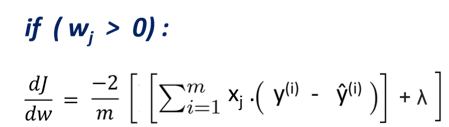



```
```

**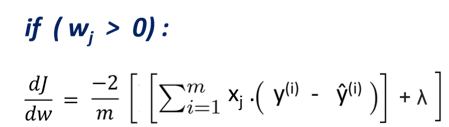**

Gradient for bias


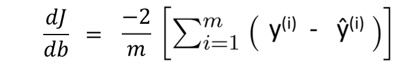

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_house = pd.read_csv('/content/Housing_data.csv')
df_house.head()
     

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
df_house.shape

(1460, 81)

In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The above observation gives the count of Non-Null values and their respective Datatypes of each variable



In [6]:
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype('object')
df_house['YearBuilt'] = df_house['YearBuilt'].astype('str')
df_house['YearRemodAdd'] = df_house['YearRemodAdd'].astype('str')
df_house['MoSold'] = df_house['MoSold'].astype('str')
df_house['YrSold'] = df_house['YrSold'].astype('str')

The above columns consists of years, which must be Categorical for our Analysis, hence we convert these variables from Integer to String.

In [7]:
df_house.drop('Id', axis=1, inplace=True)
df_house_copy = df_house.copy()

Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

In [8]:
df_house_copy.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


Inference :

1.Most of the value are in different units hence we must implement feature engineering.

2.Looking at the statistics it can be infered that most the features are skewed.

In [9]:
def missing_values(df):
  missing_val_count_by_column = (df.isnull().sum()/df.shape[0])*100
  return missing_val_count_by_column[missing_val_count_by_column > 0]

In [10]:
missing_values(df_house_copy)


LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

1.From above Analysis, we fetch the percentage of Missing values of inidvidual variable of the Dataset.

2.We can see that PoolQC, MiscFeature, Fence, Alley has nearly 80% missing values compared to others.

  To visualize the missing values, we plot a Heatmap which is shown below.

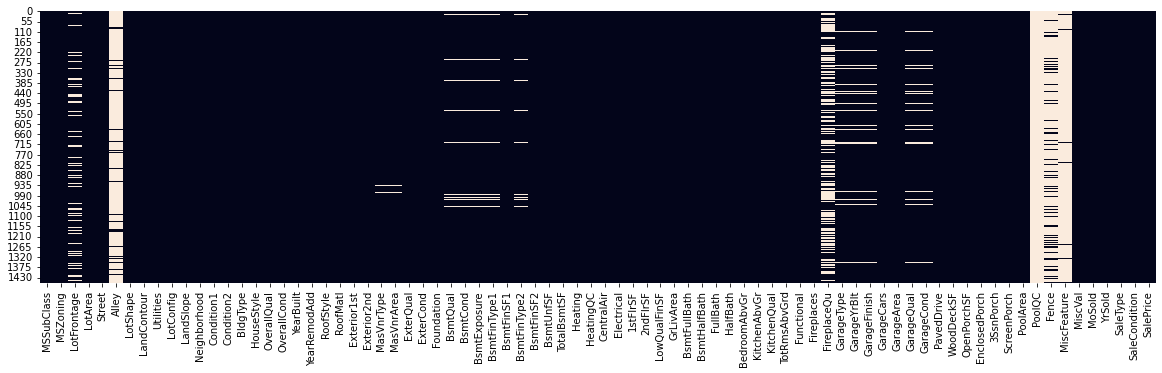

In [11]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_house_copy.isnull(), cbar=False)
plt.show()

Dropping features with more than 80% missing data

In [12]:
df_house_copy.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)
missing_values(df_house_copy)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

Hence we retain others, dropping these variables. 

## Univariate analysis of Categorical features


In [13]:
cat_cols = [df_house.columns[i] for i in range(0, df_house.shape[1])  if df_house.iloc[:,i].dtype=='O']

Let us fetch the Categorical variables from the dataset

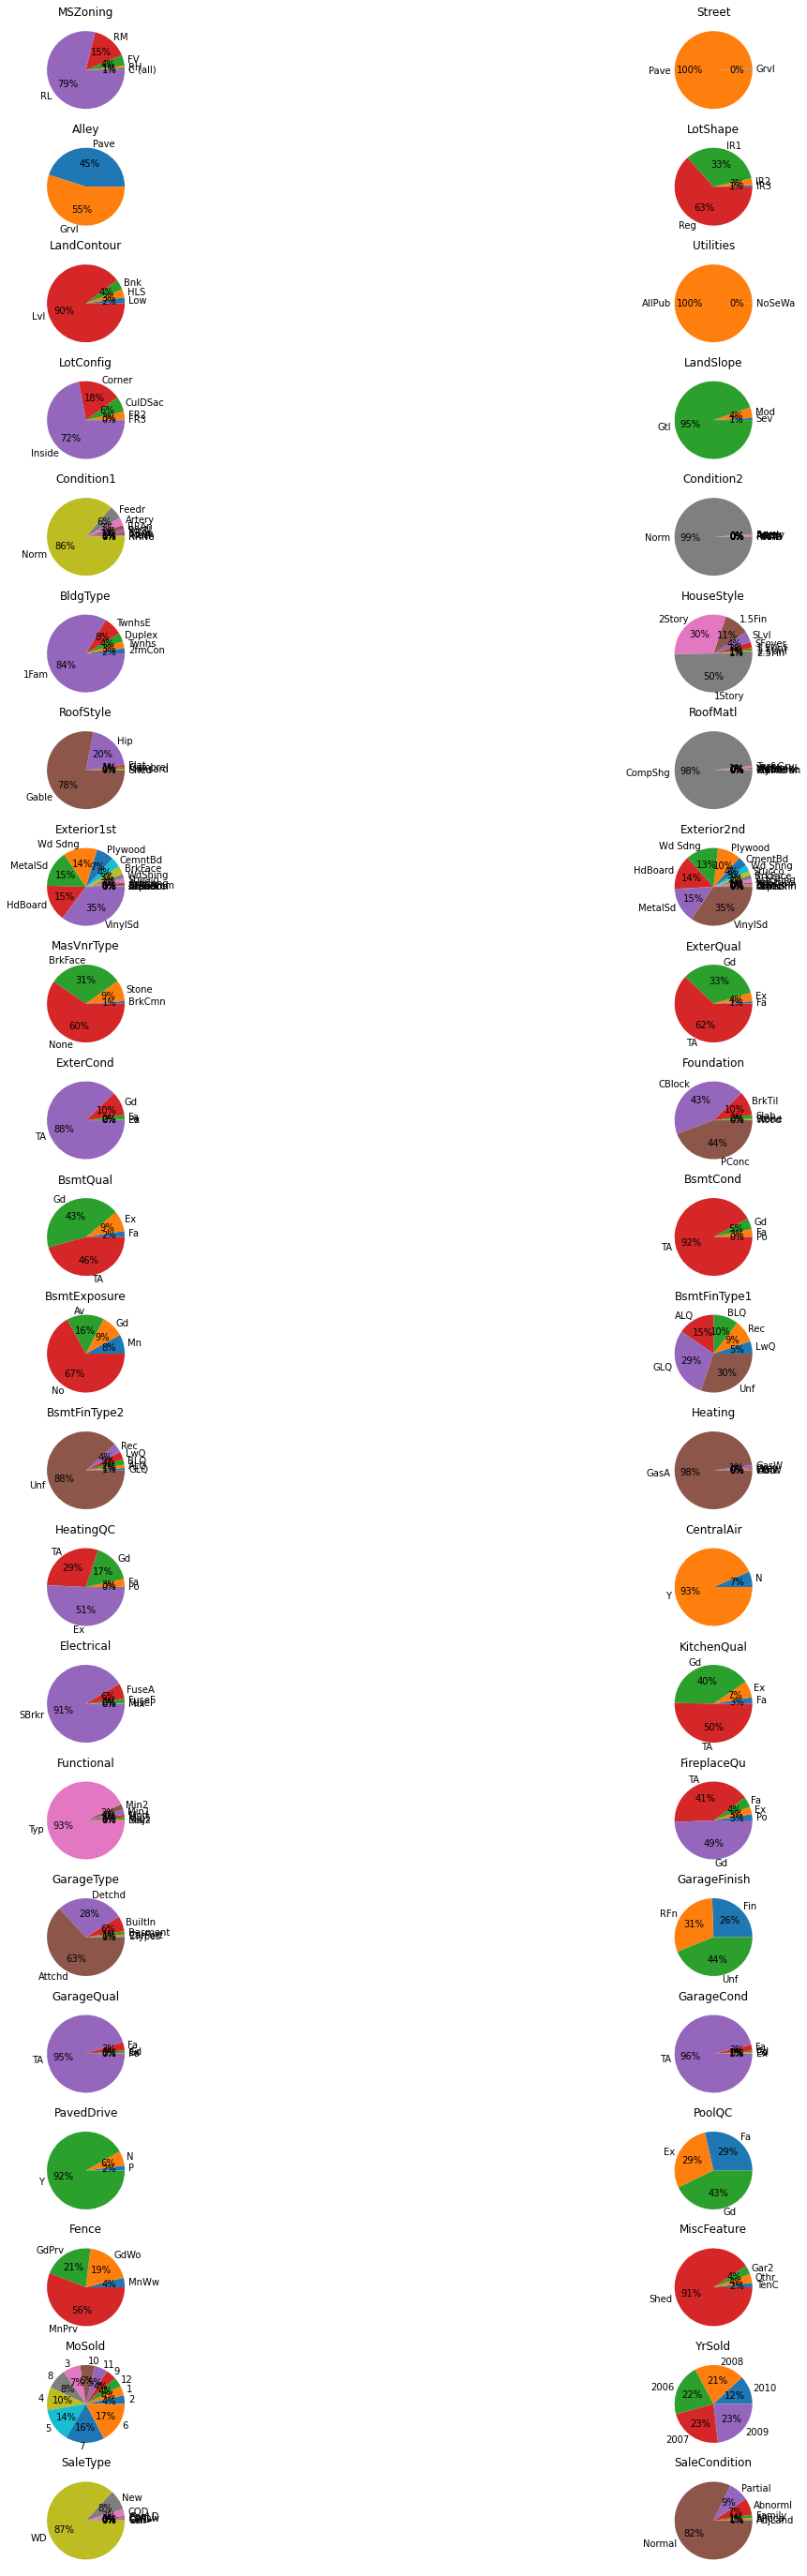

In [14]:
fig, axes = plt.subplots(22, 2, figsize=(22,50))
axes = [ax for axes_rows in axes for ax in axes_rows]

plot_cat_cols = cat_cols.copy()
plot_cat_cols.remove('Neighborhood')
plot_cat_cols.remove('YearBuilt')
plot_cat_cols.remove('YearRemodAdd')
plot_cat_cols.remove('GarageYrBlt')

for i, c in enumerate(df_house[plot_cat_cols]):
    df_house[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=10)
    axes[i].set_ylabel('')

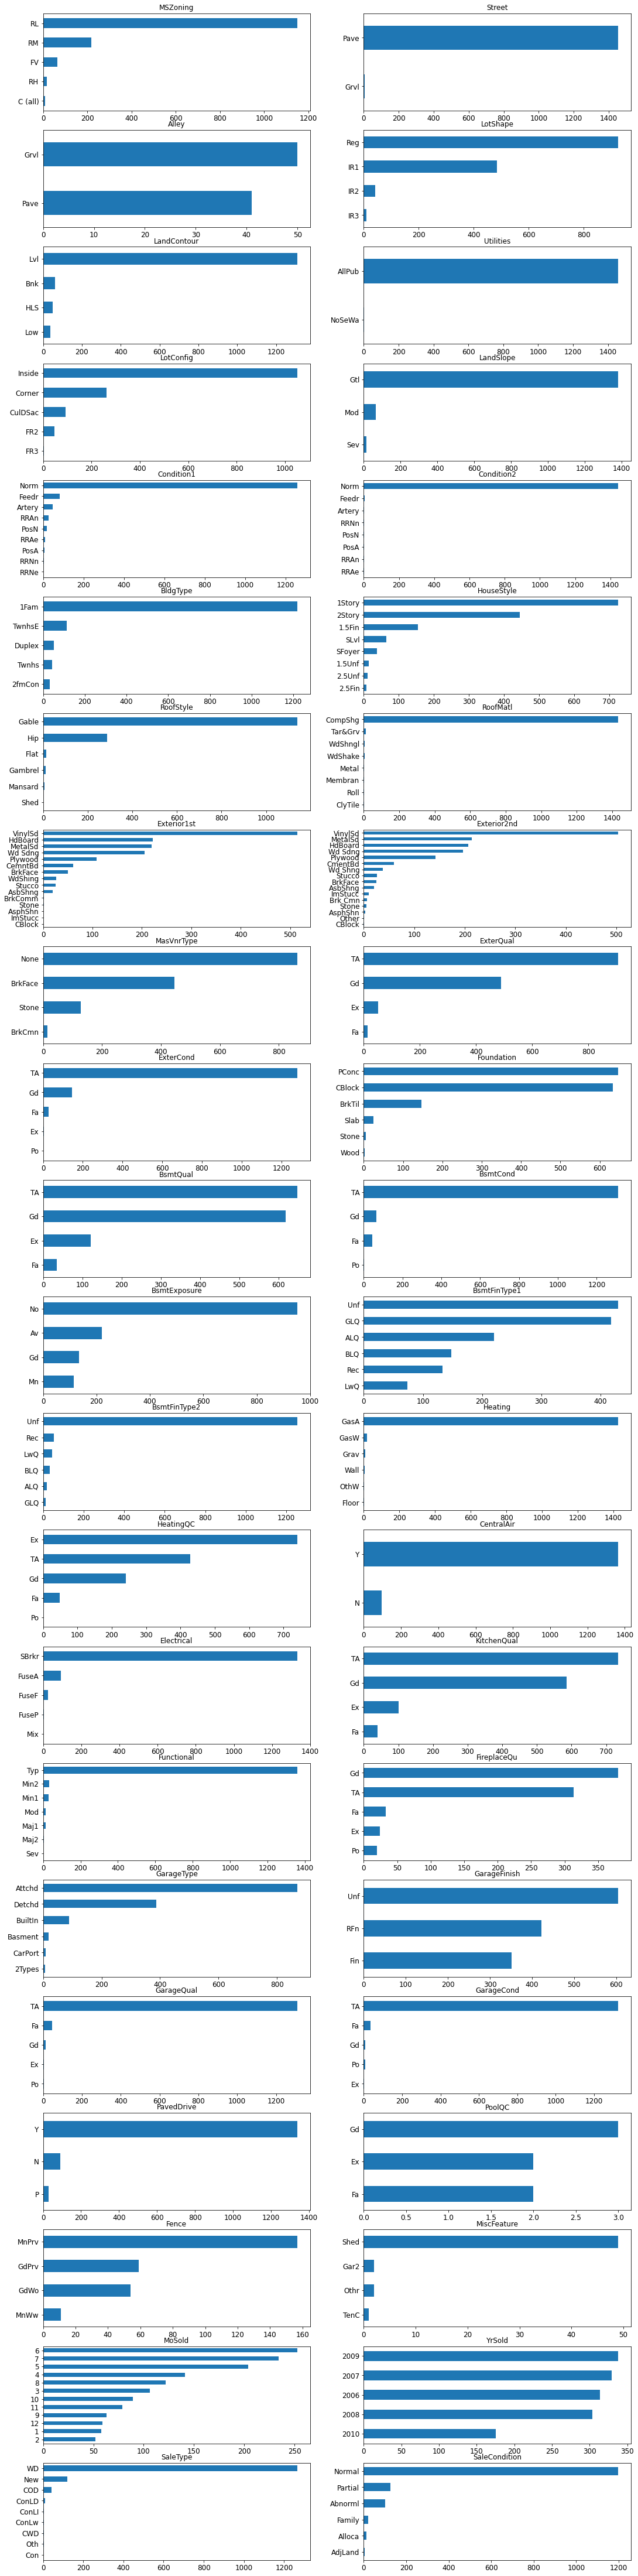

In [15]:
fig, axes = plt.subplots(22, 2, figsize=(18,80))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df_house[plot_cat_cols]):
    df_house[c].value_counts()[::-1].plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)
     


## Univariate analysis of Numerical features

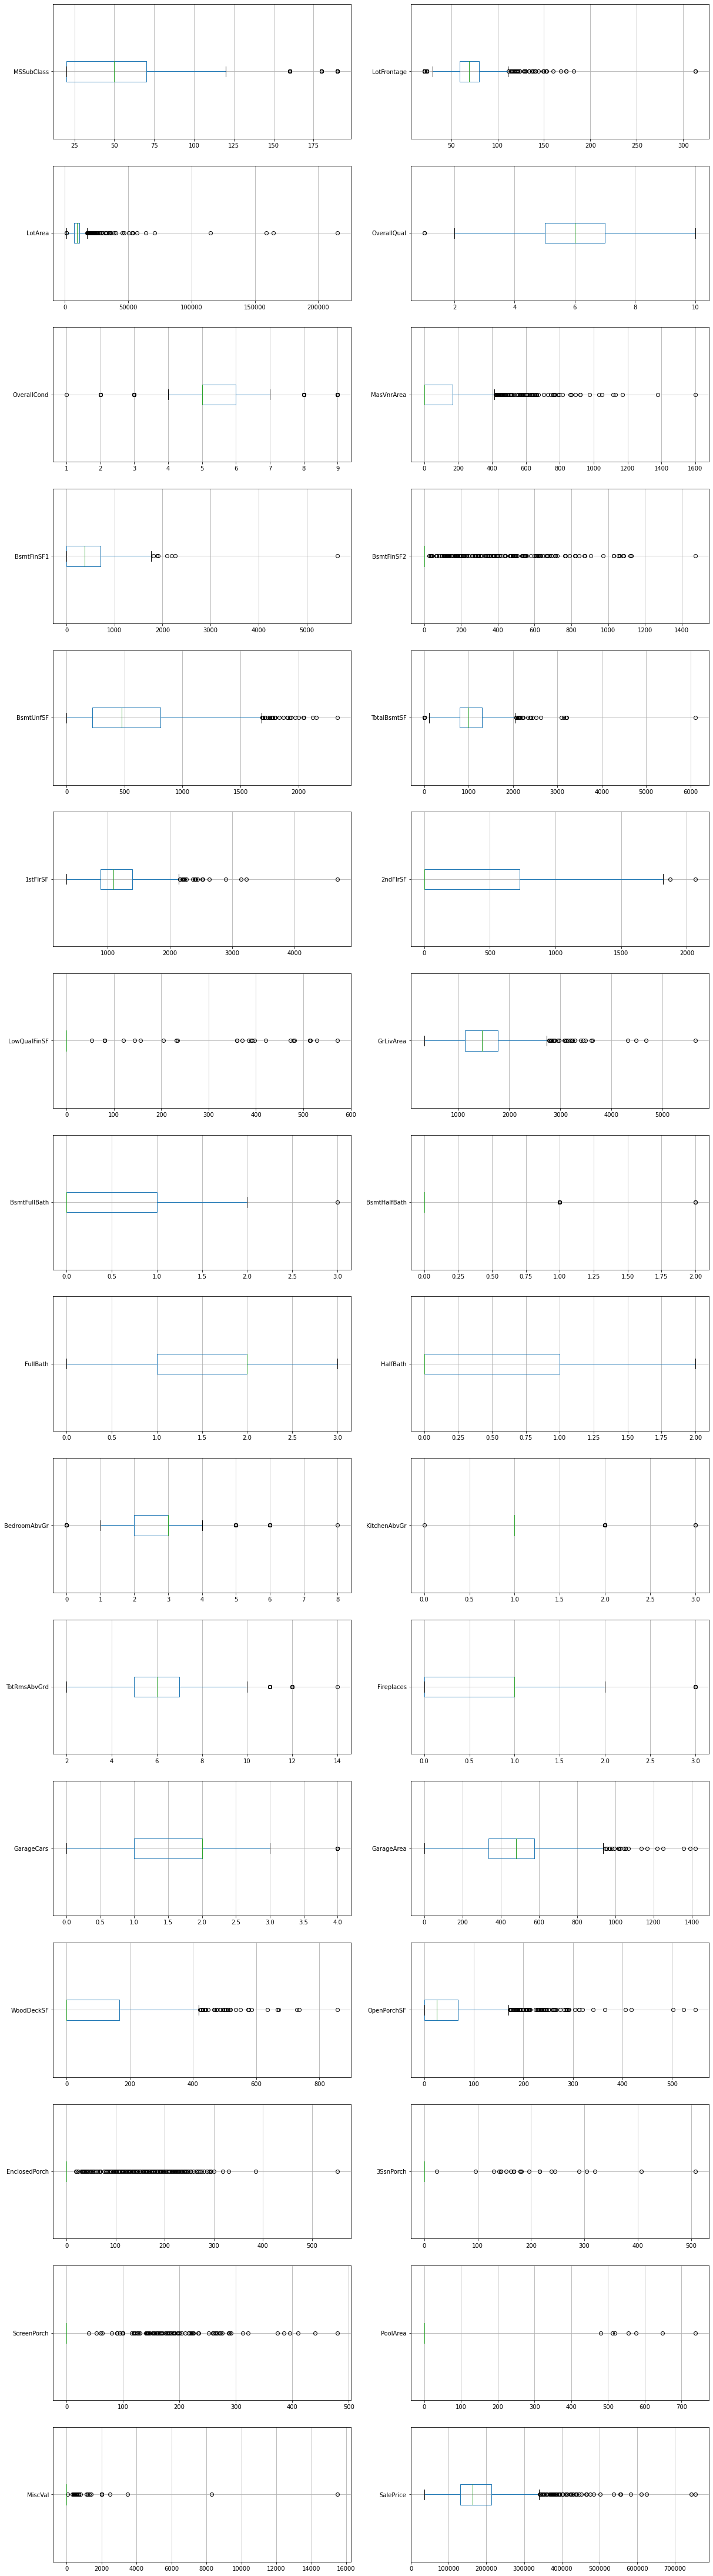

In [16]:
num_cols = [c for c in df_house.columns if c not in cat_cols]
     

fig, axes = plt.subplots(16, 2, figsize=(20,80))
y =0
for i,c in enumerate(df_house[num_cols]):
    pd.DataFrame(df_house[[c]]).boxplot(ax=axes.flatten()[i], vert=False)

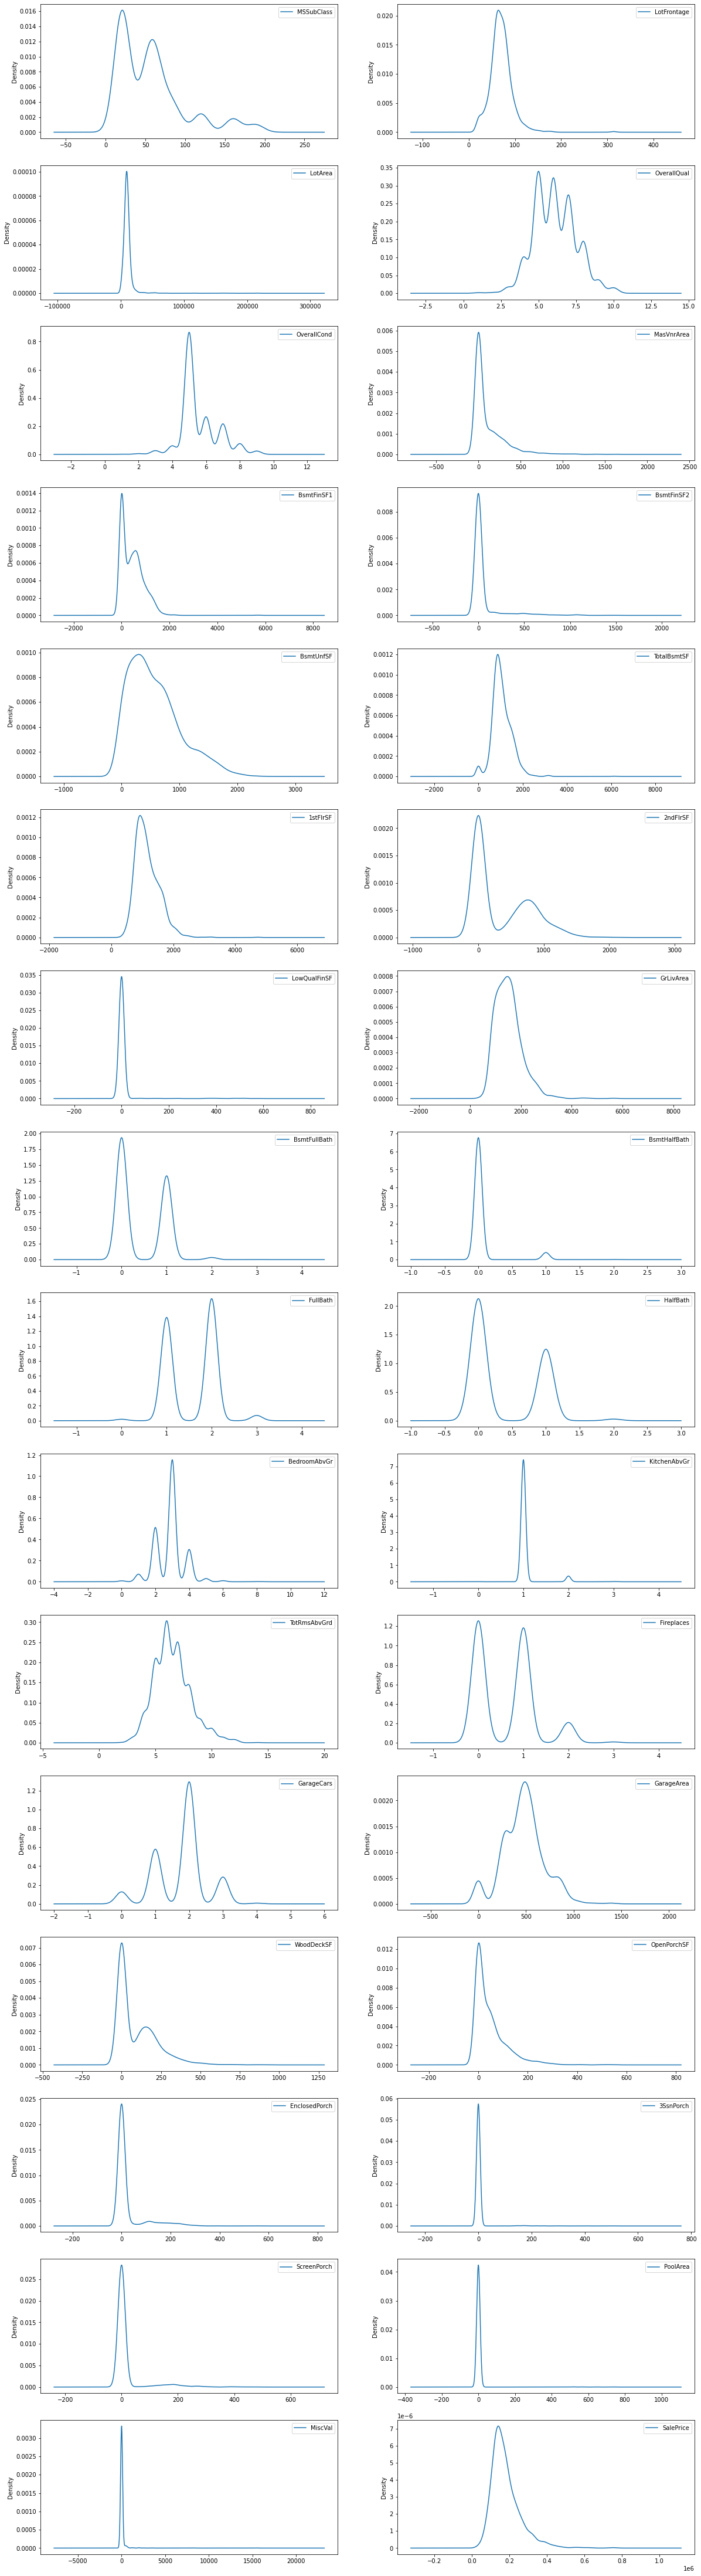

In [17]:
fig, axes = plt.subplots(16, 2, figsize=(20,80))
y =0
for i,c in enumerate(df_house[num_cols]):
    pd.DataFrame(df_house[[c]]).plot(kind='kde', ax=axes.flatten()[i])
     

## Imputing missing values in numerical variables

In [18]:
missing_values(df_house[num_cols])

LotFrontage    17.739726
MasVnrArea      0.547945
dtype: float64

<Axes: xlabel='LotFrontage'>

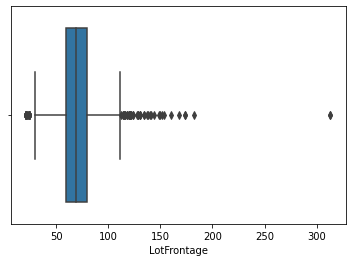

In [19]:
sns.boxplot(x = df_house['LotFrontage'])

In [20]:
df_house['LotFrontage'].fillna(df_house['LotFrontage'].median(), inplace=True)
     

From above analysis, LotFrontage has many outliers present towards the rightend of the Whiskers. Hence we impute NULL Values with its median.

<Axes: xlabel='MasVnrArea'>

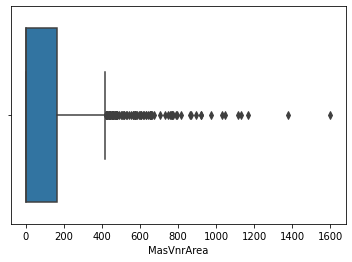

In [21]:
sns.boxplot(x = df_house['MasVnrArea'])


In [22]:
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].median(), inplace=True)

From above analysis, MasVnrArea has huge amount of Outliers, hence we impute NULL Values with Median.

In [23]:
df_house[num_cols].isnull().sum()
     

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

From above we can see that all the NULL Values are imputed on Numerical Variables and the resultant is 0

In [24]:
missing_cat = missing_values(df_house[cat_cols])
missing_cat
     

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [25]:
import statistics as st
for i in missing_cat[missing_cat>0].index:
    if i == 'MasVnrType':
        df_house['MasVnrType'].fillna(st.mode(df_house['MasVnrType']), inplace=True)
    if i == 'GarageYrBlt':
        df_house['GarageYrBlt'].fillna(st.mode(df_house['GarageYrBlt']), inplace=True)
    else:
        df_house[i] = df_house[i].replace(np.nan, 'Na')
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype('str')
     

From above, the Missing values in 'MasVnrType" are imputed with the its respective Mode.

Also for the variable GarageYrBlt, the missing values are imputed with its respective Mode.

For other Categorical variables, the missing values are replaced from NA to 'Na'.

The resultant Categorical variables have 0 missing values as seen below

In [26]:
df_house[cat_cols].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [69]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    

  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b

  def score(self, X, y):
        Y_prediction = self.predict(X)
        return 1 - ((y - Y_prediction) ** 2).sum() / ((y - y.mean()) ** 2).sum()


  def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
        if len(y_true) != len(y_pred):
            raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
        squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
        mse1 = sum(squared_differences) / len(squared_differences)
      
        return mse1
  def r2(self,y_true, y_pred):
    # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
    
    # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
    
      return r2_score

In [70]:
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.randn(100, 5)
y = X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

In [71]:
# Split the data into training and test sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

In [79]:
# Fit the model
model = Lasso_Regression(learning_rate = 0.01, no_of_iterations=500,
                         lambda_parameter=10)
model.fit(X_train, y_train)

In [80]:
test_data_prediction = model.predict(X_test)

In [81]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
error = np.mean((y_test - y_pred) ** 2)
print("Test MSE:", error)

Test MSE: 0.9290652418309773


In [82]:
total_sum_squares = np.sum((y_test - np.mean (y_test))**2)
residual_sum_squares = np.sum((y_test - y_pred)**2)
r_squared = 1 - (residual_sum_squares / total_sum_squares)



In [83]:
# Print results
print ("Mean Squared Error:" , error)
print ("R-squared score:",r_squared)

Mean Squared Error: 0.9290652418309773
R-squared score: 0.8393667324875843


In [84]:
import random

# define hyperparameters ranges
learning_rate_range = [0.01, 0.001, 1]
no_of_iterations_range = [50, 100, 500, 1000]
lambda_parameter_range = [1, 10, 20, 50]

# define number of iterations for random search
n_iter = 100

# define best score and best parameters
best_score = 0
best_params = {}

# perform random search
for i in range(n_iter):
    # randomly select hyperparameters from the ranges
    learning_rate = random.choice(learning_rate_range)
    no_of_iterations = random.choice(no_of_iterations_range)
    lambda_parameter = random.choice(lambda_parameter_range)
    
    # create instance of Lasso_Regression model with randomly selected hyperparameters
    lasso = Lasso_Regression(learning_rate=learning_rate, no_of_iterations=no_of_iterations, lambda_parameter=lambda_parameter)

    # fit the model to the training data
    lasso.fit(X_train, y_train)
    
    # calculate the score using the validation data
    score = lasso.score(X_test, y_test)
    
    # check if the current score is better than the best score so far
    if score > best_score:
        best_score = score
        best_params = {'learning_rate': learning_rate, 'no_of_iterations': no_of_iterations, 'lambda_parameter': lambda_parameter}

# print the best parameters and best score
print("Best parameters: ", best_params)
print("Best score: ", best_score)

<ipython-input-69-21b400f81208>:74: RuntimeWarning: overflow encountered in square
  return 1 - ((y - Y_prediction) ** 2).sum() / ((y - y.mean()) ** 2).sum()


Best parameters:  {'learning_rate': 0.01, 'no_of_iterations': 1000, 'lambda_parameter': 10}
Best score:  0.839367437116256


In [30]:
import numpy as np

def soft_threshold(rho, lambda_):
    """Soft threshold function."""
    if rho < -lambda_:
        return rho + lambda_
    elif rho > lambda_:
        return rho - lambda_
    else:
        return 0

def coordinate_descent_lasso(X, y, lambda_, alpha=1, num_iters=1000, intercept=True):
    """Coordinate descent algorithm for Lasso regression."""
    n_samples, n_features = X.shape
    beta = np.zeros(n_features)
    if intercept:
        X = np.column_stack((np.ones((n_samples, 1)), X))
        beta = np.zeros(n_features + 1)

    for _ in range(num_iters):
        for j in range(n_features + 1):
            X_j = X[:, j]
            y_pred = X @ beta
            y_pred -= X_j * beta[j]

            rho = X_j @ (y - y_pred)
            if j == 0:
                beta_0 = rho
                beta[0] = beta_0
            else:
                beta[j] = soft_threshold(rho, lambda_ * alpha) / (1 + lambda_ * (1 - alpha))

    return beta

def lasso_regression(X_train, y_train, X_val, y_val, lambda_, alpha=1, num_iters=1000, intercept=True):
    """Fit Lasso regression model and calculate MSE on validation set."""
    beta = coordinate_descent_lasso(X_train, y_train, lambda_, alpha=alpha, num_iters=num_iters, intercept=intercept)
    y_pred = X_val @ beta
    mse = np.mean((y_pred - y_val) ** 2)
    return mse
